# TensorFlow Tutorial on Neural Network and CNN for Digit Recognition

## 1. TensorFlow

- Tensorflow is already in google colab, no installation is needed


## 2. Load the digit dataset: mnist

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


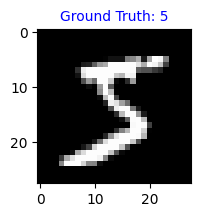

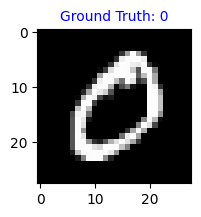

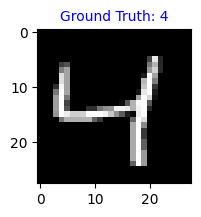

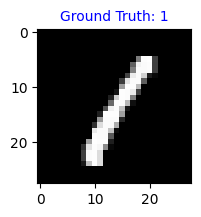

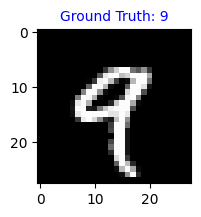

In [2]:
# take a look at the digit dataset
import matplotlib.pyplot as plt

# show the first n digit image with their labels in a row
n=5

for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[i], cmap='gray')
    plt.title('Ground Truth: ' + str(y_train[i]), fontsize=10, color= 'blue')

In [3]:
# Print the matrix representation of an image
def display2Darray(matrix):
    print('\n'.join(''.join('{:4}'.format(item) for item in row) for row in matrix))

display2Darray(x_train[0])

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

## 3. Preprocess the data

In [4]:
# One-hot encoding for the class labels
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

# normalize the inputs
x_train_normalized = tf.keras.utils.normalize(x_train, axis=1) # normalize the data: rescaling of the data from the original range so that all values are within the range of 0 and 1.
x_test_normalized = tf.keras.utils.normalize(x_test, axis=1)


## 4. Build a single layer perceptron model

In [6]:
# a signle layer perceptron model. no hidden layer
perceptron_model = tf.keras.Sequential() # create a sequential model
perceptron_model.add(tf.keras.layers.Flatten(input_shape=[28, 28, 1]))
perceptron_model.add(tf.keras.layers.Dense(10, activation='softmax'))

# this configures the training of the model. Keras calls it "compiling" the model.
perceptron_model.compile(
  optimizer='sgd',
  loss= 'categorical_crossentropy',
  metrics=['accuracy']) # % of correct answers

# print model layers
perceptron_model.summary()

# training the model
history = perceptron_model.fit(x_train_normalized, y_train_one_hot, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 17s 5ms/step - loss: 1.3847 - accuracy: 0.7443
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7919 - accuracy: 0.8398
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6385 - accuracy: 0.8555
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5649 - accuracy: 0.8641
Epoch 5/1

In [7]:
# do prediction
import numpy as np
predictions = perceptron_model.predict(x_test_normalized)
y_pred = np.argmax(predictions, axis=1)
acc = sum(y_pred == y_test)/len(y_test)
print("The accuracy on test set: ", acc)

313/313 [==============================] - 1s 2ms/step
The accuracy on test set:  0.897


## 5. Build a feedford neural network (multi-layer perceptron) model

In [8]:
# a feed-forward neural network with two hidden layer.
nn_model = tf.keras.Sequential() # create a sequential model
nn_model.add(tf.keras.layers.Flatten(input_shape=[28, 28, 1]))
nn_model.add(tf.keras.layers.Dense(200, activation="relu"))
nn_model.add(tf.keras.layers.Dense(200, activation="relu"))
nn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

# this configures the training of the model. Keras calls it "compiling" the model.
nn_model.compile(
  optimizer='sgd',
  loss= 'categorical_crossentropy',
  metrics=['accuracy']) # % of correct answers

# print model layers
nn_model.summary()

# training the model
history = nn_model.fit(x_train_normalized, y_train_one_hot, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               157000    
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199210 (778.16 KB)
Trainable params: 199210 (778.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0564 - accuracy: 0.7615
Epoch 2/10
1875/1875 [======================

In [9]:
# do prediction
import numpy as np
predictions = nn_model.predict(x_test_normalized)
y_pred = np.argmax(predictions, axis=1)
acc = sum(y_pred == y_test)/len(y_test)
print("The accuracy on test set: ", acc)

313/313 [==============================] - 1s 2ms/step
The accuracy on test set:  0.9475


## 6. Build a Convolutional Neural network

In [10]:
# CNN model
cnn_model = tf.keras.models.Sequential()   # Create a sequential model

# add network layers
cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tf.keras.layers.MaxPool2D((2,2)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D((2,2)))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

cnn_model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
cnn_model.summary()

history = cnn_model.fit(x_train_normalized, y_train_one_hot, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [11]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
predictions = cnn_model.predict(x_test_normalized)
y_pred = np.argmax(predictions, axis=1)
acc = sum(y_pred == y_test)/len(y_test)
print("The accuracy on test set: ", acc)

313/313 [==============================] - 1s 2ms/step
The accuracy on test set:  0.9808


## 7. Visualization the Prediction

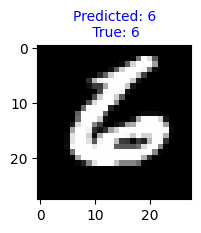

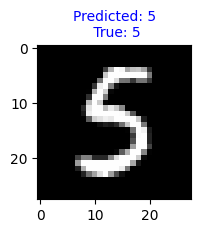

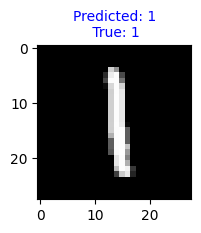

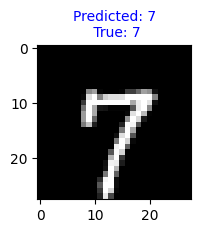

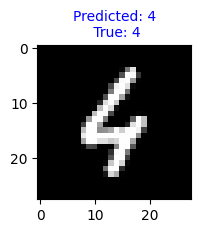

In [13]:
idx = np.argsort(y_pred==y_test) # sort order: unrecognized first
## print the correct predictions
for i in range(1, n+1):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[idx[-i]], cmap='gray')
    plt.title('Predicted: ' + str(y_pred[idx[-i]]) + "\n True: " + str(y_test[idx[-i]]), fontsize=10, color= 'blue')

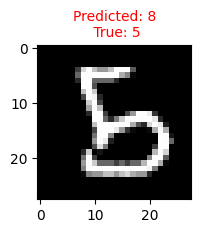

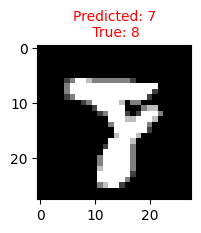

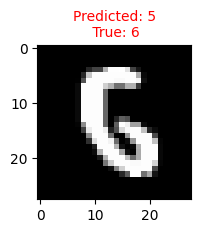

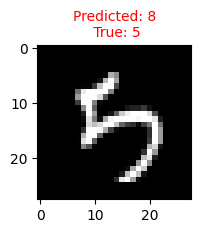

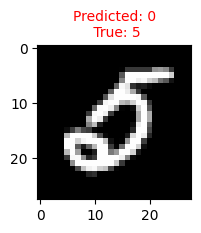

In [14]:
## print the wrong predictions
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[idx[i]], cmap='gray')
    plt.title('Predicted: ' + str(y_pred[idx[i]]) + "\n True: " + str(y_test[idx[i]]) , fontsize=10, color= 'red')